<a href="https://colab.research.google.com/github/Qen-byte/AI-search-algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter


In [2]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [9]:
print(f"training size: {x_train.shape[0]}")
print(f"testing size: {x_test.shape[0]}")

training size: 120
testing size: 30


In [10]:
scaler=Normalizer().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
print("x train before normalization")
print(x_train[0:5])
normalized_x_train = scaler.fit_transform(x_train)
print("x train after normalization")
print(x_train[0:5])

x train before normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]
x train after normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'After Normalization')

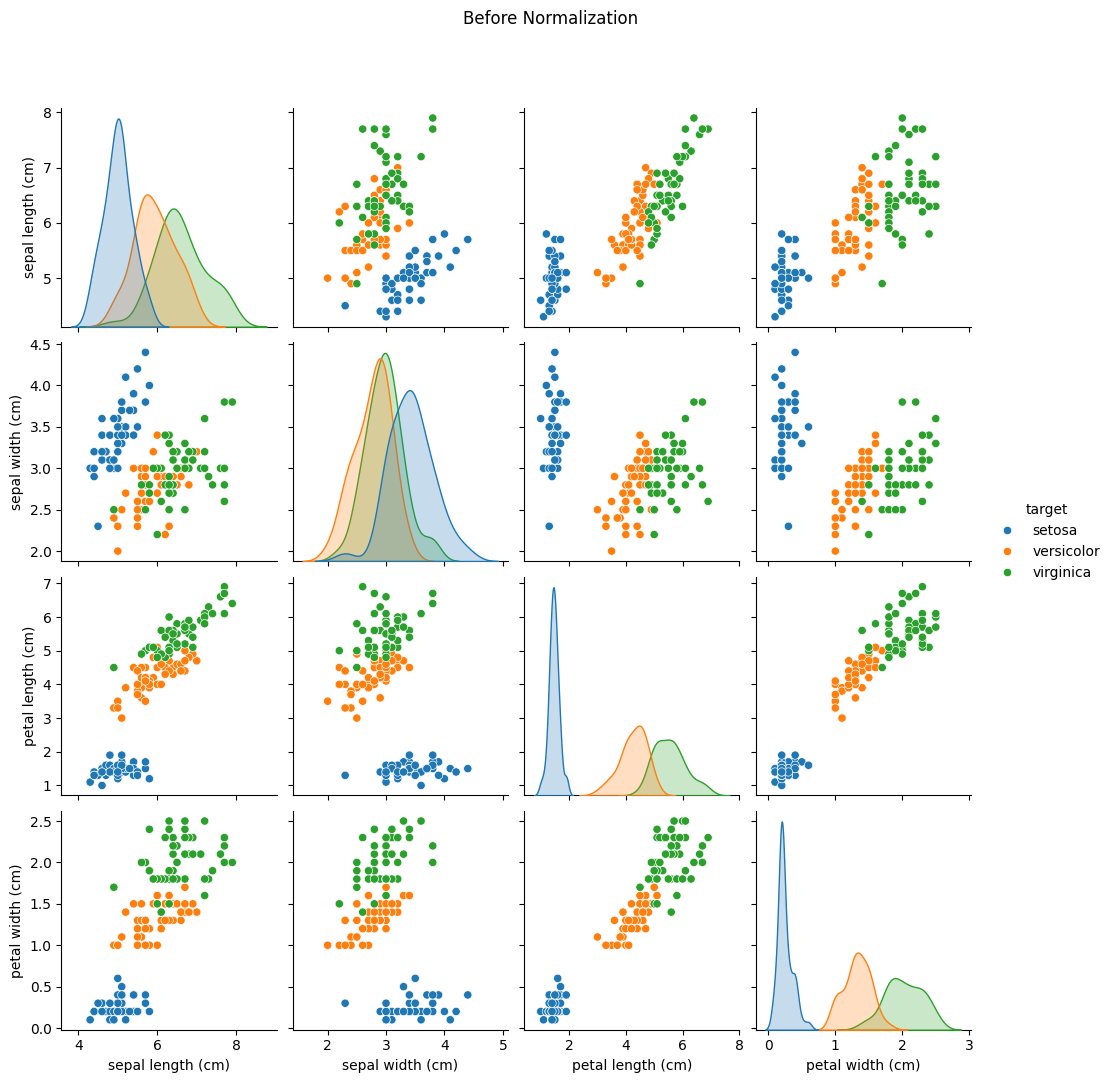

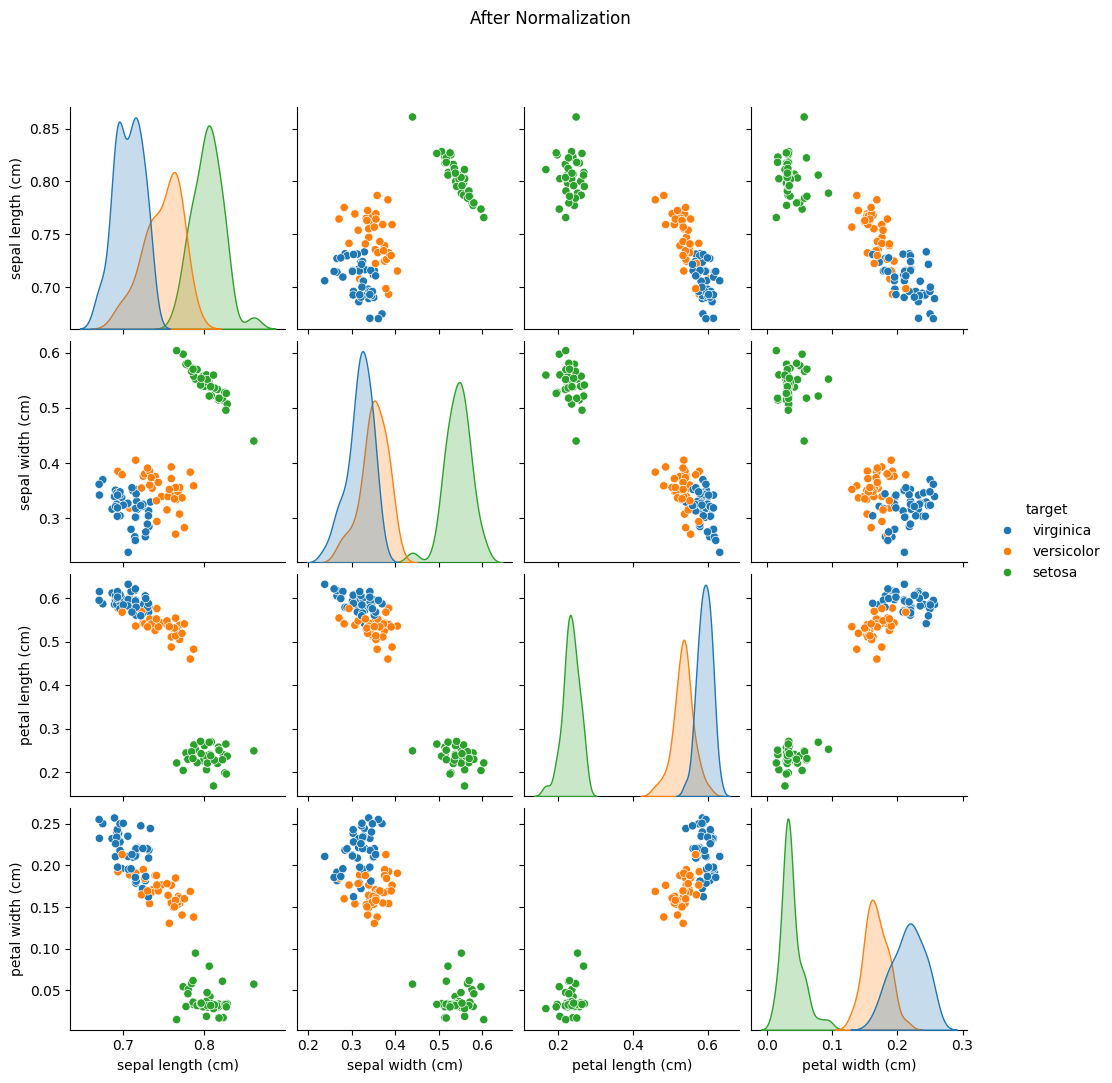

In [24]:
di={0:'setosa', 1:'versicolor', 2:'virginica'}
before=sns.pairplot(iris_df.replace({'target':di}), hue='target')
before.fig.suptitle("Before Normalization",y=1.08)

iris_df_2=pd.DataFrame(data=np.c_[x_train,y_train],columns=iris_df.columns)


di={0:'setosa', 1:'versicolor', 2:'virginica'}
after=sns.pairplot(iris_df_2.replace({'target':di}), hue='target')
after.fig.suptitle("After Normalization",y=1.08)